# 第07回　数理工学実験２

## 12 常微分方程式

常微分方程式は自然・社会現象の記述から様々なものの設計に至るまであらゆる分野で用いられており、数値計算の力が最も役立つ分野の一つでもあります。これは、繰り返し文を用いて逐次的に方程式の数値解を記述できるという数値計算の能力が絶大な力を発揮することに依るものです。　　
まず、最も基本的な2変数の1階常微分方程式を範囲$x \in [a, b]$、初期値$[t, x]=[0, X_{ini}]$の下で数値的に解くことを考えます（常微分方程式の初期値問題）。

$$x(0)=X_{ini}$$
$$\frac{dx}{dt}=f(t, x)$$

「常微分方程式を解くという事」は関数形を求める事です。上の例で言えば、$x(t)$の関数形を決めれば良いわけです。そこで、初期値$[0, X_0]$から始め上の方程式に従いながら時間刻み$h(=\frac{b-a}{n}(nは分割数))$で少しずつ時間を進め、それに対応する$x(t+h)$の数値解を求めることを考えます。解析解$x(t)$と区別するために数値解を$X(t)$と表すことにします。

$$X(0)=X_{ini}$$
$$X(t+h)=X(t)+h\Phi(t, X(t))$$

さらにアルゴリズムとして見やすくするためにステップ数$i$を用いて以下のように書き直します。

$$X_0=X_{ini}$$
$$X_{i+1}=X_i+h\Phi(t_i, X_i)$$

ここで$i$は（時間の）ステップ数を表し、$t_i=h \times i$、$X_i=X(t_i)$を表します。常微分方程式の数値的に解く場合はこの$\Phi(X_i, t_i)$の取り方が重要でありそれによって精度が変わってきます。  
以下では常微分方程式の数値的な解法として最も基本的な**オイラー法**と最もよく使われる**ルンゲクッタ法**を学びます。

### 12.1 オイラー法（1階常微分方程式）

オイラー法では$\Phi(t_i, X_i)$を決めるために、$x(t+h)$をテイラー展開し$h$が十分小さいので$h^2$以上の項を省略します。

$$
x(t+h) = x(t)+\frac{dx}{dt}h+\frac{1}{2!}\frac{d^2x}{dt^2}h^2+\frac{1}{3!}\frac{d^3x}{dt^3}h^3+ \cdots$$

$$ \approx  x(t)+\frac{dx}{dt}h$$

$$= x(t)+hf(t, x)$$

ここで解析解$x(t+h)$を数値解$X_{i+1}$へ置き換えて前式と比較すると$\Phi(t_i, X_i)=f(t_i, X_i)$となることが分かります。つまり、オイラー法の形式は下記のとおりになります。

$$X_0 = X_{ini}$$
$$X_{i+1} = X_i+h\Phi(t_i, X_i)$$
$$= X_{i}+hf(t_i, X_i) \hspace{3cm} (i=0,1,2, \cdots, n-1)$$

#### オイラー法のアルゴリズム 

Input $t_0, x_0, a, b, n$

$$h \leftarrow \displaystyle{\frac{b-a}{n}} $$

For $ i=0,1,2,\cdots , n-1 \\$

$$\hspace{10mm}  X \leftarrow X+hf(t, X) $$

$$\hspace{10mm} t \leftarrow t+h $$

$$\hspace{10mm}  Output X $$

end For

それではオイラー法で下記の常微分方程式を解いてみましょう。

$$\frac{dx}{dt}=-4(t-1)x$$

$t$の範囲は$t \in [0,1]$、初期条件を$[t_0, X_0]=[0, e^{-2}]$、分割数は$n=10$とします。

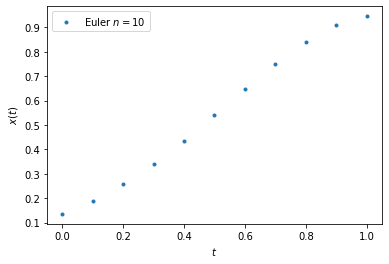

In [1]:
#(前進差分)オイラー法
import numpy as np
import matplotlib.pyplot as plt
from math import *

def euler(t0, x0, a, b, f, n):
    h=(b-a)/n
    #print(h)
    t=np.zeros(n+1)
    x=np.zeros(n+1)
    t[0]=t0
    x[0]=x0
    #print(t0)
    for i in range(0,n):
        t[i+1] = t[i] + h
        x[i+1] = x[i]+ h*f(t[i],x[i])
        
    return t, x
    
def func1(t, x):
    return (-4)*(t - 1) * x

if __name__=='__main__':
    t0=0
    x0=exp(-2)
    a=0
    b=1
    n=10

    t, x=euler(t0,x0,a,b,func1,n)
    #print(t, x)
    plt.plot(t,x, marker=".", linestyle="", label="Euler $n=10$")
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.legend(loc='upper left')
    plt.show()

#### 解析解と数値解の比較

刻み幅を$n=10, 100, 1000$と変え解析解と比較してみましょう。

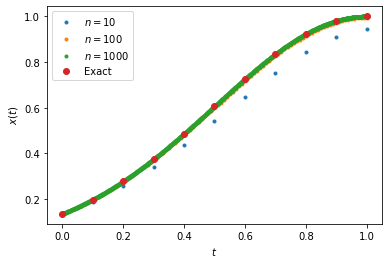

In [2]:
x_e=np.exp(-2*(t-1)**2) #厳密解（ユニバーサル関数を用いている）
t10, x_e10=euler(t0,x0,a,b,func1,10)
t100, x_e100=euler(t0,x0,a,b,func1,100)
t1000, x_e1000=euler(t0,x0,a,b,func1,1000)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')

plt.plot(t10,x_e10, marker=".", linestyle="", label="$n=10$")
plt.plot(t100,x_e100, marker=".", linestyle="", label="$n=100$")
plt.plot(t1000,x_e1000, marker=".", linestyle="", label="$n=1000$")
plt.plot(t,x_e, marker="o", linestyle="", label="Exact")

plt.legend(loc='upper left')
plt.show()

### 12.2 4次のルンゲクッタ法（1階常微分方程式）

オイラー法は非常に単純なので微分方程式の数値解法を理解する最適な方法ですが、誤差がより少なくなる微分方程式の数値解法があります。ここでは、よく使われる微分方程式の数値解法として4次のルンゲクッタ法を紹介します。  

$$X_0 =X_{ini}$$

$$X_{i+1} =X_i+h\Phi(t_i, X_i) \hspace{3cm} (i=0,1,2, \cdots, n-1)$$

$$\Phi(t_i, X_i)=\frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

ただし、

$$k_1 = f(t_i, X_i)$$

$$k_2 = f(t_i+\frac{h}{2}, X_i+\frac{h}{2}k_1)$$

$$k_3 = f(t_i+\frac{h}{2}, X_i+\frac{h}{2}k_2)$$

$$k_4 = f(t_i+h, X_i+hk_3)$$

この公式が成り立つ理由はここでは説明しません。（実は4次のルンゲクッタ法はテイラー展開の4次までの近似と一致します。）

#### 4次のルンゲクッタ法のアルゴリズム 

Input $t_0, x_0, a, b, n$

$h \leftarrow \displaystyle{\frac{b-a}{n}}$  

For $i=0,1,2,\cdots , n-1$ 

$ \hspace{10mm} k_1 \leftarrow f(t, X)$

$ \hspace{10mm} k_2 \leftarrow f(t+\frac{h}{2}, X+\frac{h}{2}k_1)$

$ \hspace{10mm}k_3 \leftarrow f(t+\frac{h}{2}, X+\frac{h}{2}k_2)$

$ \hspace{10mm}k_4 \leftarrow f(t+h, X+hk_3)$

$ \hspace{10mm}X \leftarrow X+\frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

$  \hspace{10mm}Output X$

end For

先ほどと同じ常微分方程式を今度はルンゲクッタ法で数値的に解いてみます。

$$\frac{dx}{dt}=-4(t-1)x$$

$t$の範囲は$t \in [0,1]$、初期条件を$[t_0, X_0]=[0, e^{-2}]$、分割数は$n=10$とします。

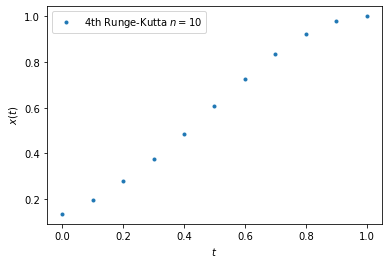

In [4]:
#4次のルンゲクッタ法
import numpy as np
import matplotlib.pyplot as plt
from math import *

def rungekutta(t0, x0, a, b, f, n):
    h=(b-a)/n
    t=np.zeros(n+1)
    x=np.zeros(n+1)
    t[0]=t0
    x[0]=x0
    for i in range(0,n):
        k1=f(t[i], x[i])
        k2=f(t[i]+(h/2), x[i]+(h/2)*k1)
        k3=f(t[i]+(h/2), x[i]+(h/2)*k2)
        k4=f(t[i]+h, x[i]+h*k3)
        x[i+1]=x[i]+h/6*(k1+2*k2+2*k3+k4)
        t[i+1] = t[i] + h
    return t, x
    
def func1(t, x):
    return (-4)*(t - 1) * x

def func2(t,x):
    return 4*t*(1-t)

if __name__=='__main__':
    t0=0
    x0=exp(-2)
    a=0
    b=1
    n=10

    t, x1=rungekutta(t0,x0,a,b,func1,n)
    #t_2, x1_2=rungekutta(0, 0, 0, 10, func2, 100)
    
    plt.plot(t,x1, marker=".", linestyle="", label="4th Runge-Kutta $n=10$")
    #plt.plot(t_2,x1_2, marker=".", linestyle="", label="4th Runge-Kutta $n=10$")
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.legend(loc='upper left')
    plt.show()

### 12.3 数値解と厳密解の比較

厳密解とオイラー法($n=10$)の数値解、ルンゲクッタ法($n=10$)の数値解を比較します。

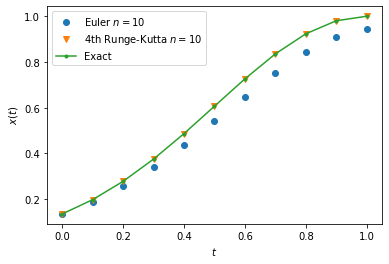

In [5]:
plt.plot(t,x, marker="o", linestyle="", label="Euler $n=10$")
test, xtest=rungekutta(t0,x0,a,b,func1,10)
plt.plot(test,xtest, marker="v", linestyle="", label="4th Runge-Kutta $n=10$")
    
x2=np.exp(-2*(t-1)**2)
plt.plot(t,x2, marker=".", linestyle="-", label="Exact")
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend(loc='upper left')
plt.show()

ルンゲクッタ法がオイラー法と比較し精度よく厳密解を近似しているのが分かります。

#### 問題
様々な微分方程式についてオイラー法とルンゲクッタ法を用いて計算し、精度の違いを比較しなさい。

### 12.4 オイラー法（2階常微分方程式）

続いて、高階常微分方程式をオイラー法で解いてみます。既に微分方程式で学んだように高階常微分方程式は連立1階常微分方程式へ帰着できます。簡単のためここでは2階常微分方程式について考えます。 


$$\frac{d^2x}{dt^2}=f(t, x, \frac{dx}{dt})$$

ここで$\displaystyle{\frac{dx}{dt}=y}$とおくと

$$\frac{dx}{dt}=y$$

$$\frac{dy}{dt}=f(t, x, y)$$

となる。一般的に表すと

$$\frac{dx}{dt}=f_1(t, x, y)$$

$$\frac{dy}{dt}=f_2(t, x, y)$$

となるので、この連立1階常微分方程式にオイラー法を適用してみましょう。

$$x(t+h)= x(t)+hf_1(t, x, y)$$

$$y(t+h)= y(t)+hf_2(t, x, y)$$

ステップ数を用いて表現すると

$$X_0 = X_{ini}$$

$$Y_0 = Y_{ini}$$

$$X_{i+1} = X_i+h\Phi_1(t_i, X_i, Y_i)$$

$$= X_i + hf_1(t, X_i, Y_i)$$

$$Y_{i+1} = Y_i+h\Phi_2(t_i, X_i, Y_i)$$

$$= Y_i + hf_2(t, X_i, Y_i) \hspace{3cm} (i=0,1,2, \cdots, n-1)$$

#### オイラー法(2階常微分方程式)のアルゴリズム 

Input $t_0, x_0, y_0, a, b, n$

$h \leftarrow \displaystyle{\frac{b-a}{n}}$

For $i=0,1,2,\cdots , n-1$

$\hspace{10mm}  X \leftarrow X+hf_1(t, X, Y)$

$\hspace{10mm} Y \leftarrow Y+hf_2(t, X, Y)$

$\hspace{10mm} t \leftarrow t+h$

$\hspace{10mm} Output X, Y$

end For

以下の常微分方程式をオイラー法で解いてみます。

$$\frac{d^2x}{dt^2}=-x$$

$t$の範囲は$t \in [0,10]$、初期条件を$[t_0, X_0, Y_0]=[0, 1, 0]$、分割数は$n=100$とします。  
連立1階常微分方程式へ帰着させると

$$\frac{dx}{dt}= y(=f_1(t, x, y))$$

$$\frac{dy}{dt}= -x(=f_2(t, x, y))$$

ステップ数を用いて表現すると

$$X_0 = 1$$

$$Y_0 = 0$$

$$X_{i+1} = X_i + hY_i$$

$$Y_{i+1} = Y_i + h \times (-X_i) \hspace{3cm} (i=0,1,2, \cdots, n-1)$$

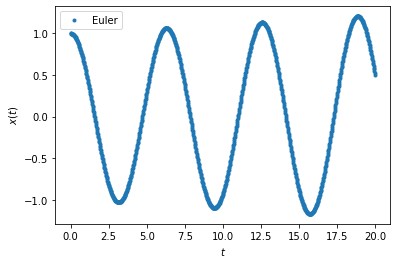

In [6]:
#オイラー法（2階常微分方程式）
import numpy as np
import matplotlib.pyplot as plt
from math import *

def euler2(t0, x0, y0, a, b, f1, f2, n):
    h=(b-a)/n
    #print(h)
    t=np.zeros(n+1)
    x=np.zeros(n+1)
    y=np.zeros(n+1)
    t[0]=t0
    x[0]=x0
    y[0]=y0
    #print(t0)
    for i in range(0,n):
        x[i+1] = x[i] + h*f1(t[i],x[i],y[i])
        y[i+1] = y[i] + h*f2(t[i],x[i],y[i])
        t[i+1] = t[i] + h
    return t, x
    
def func1(t, x, y):
    return y

def func2(t, x, y):
    return -x

if __name__=='__main__':
    t0=0
    x0=1
    y0=0
    a=0
    b=20
    n=1000

    t, x3=euler2(t0,x0,y0, a,b,func1, func2, n)
    #print(t, x)
    plt.plot(t,x3, marker=".", linestyle="", label="Euler")
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.legend(loc='upper left')
    plt.show()

### 12.5 4次のルンゲクッタ法（2階常微分方程式）

上記と同様に今度は4次のルンゲクッタ法を用いて2階常微分方程式を解くことを考えてみましょう。  
ステップ数を用いた表現は下記のとおりになります。

$$X_0 = X_{ini}$$

$$Y_0 =Y_{ini}$$

$$X_{i+1} = X_i+h\Phi_1(t_i, X_i)$$

$$Y_{i+1} = Y_i+h\Phi_2(t_i, X_i) \hspace{3cm} (i=0,1,2, \cdots, n-1)$$

$$\Phi_1(t_i, X_i) = \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

$$\Phi_2(t_i, X_i) = \frac{1}{6}(l_1 + 2l_2 + 2l_3 + l_4)$$

ただし、

$$k_1 = f_1(t_i, X_i, Y_i)$$

$$l_1 = f_2(t_i, X_i, Y_i)$$

$$k_2 = f_1(t_i+\frac{h}{2}, X_i+\frac{h}{2}k_1, Y_i+\frac{h}{2}l_1)$$

$$l_2 = f_2(t_i+\frac{h}{2}, X_i+\frac{h}{2}k_1, Y_i+\frac{h}{2}l_1)$$

$$k_3 = f_1(t_i+\frac{h}{2}, X_i+\frac{h}{2}k_2, Y_i+\frac{h}{2}l_2)$$

$$l_3 = f_2(t_i+\frac{h}{2}, X_i+\frac{h}{2}k_2, Y_i+\frac{h}{2}l_2)$$

$$k_4 = f_1(t_i+h, X_i+hk_3, Y_i+hl_3)$$

$$l_4 = f_2(t_i+h, X_i+hk_3, Y_i+hl_3)$$

### レポート問題
下記の常微分方程式の数値解をオイラー法と4次のルンゲクッタ法で計算し、厳密解と比較しなさい（3つの結果を1つのグラフでまとめて表示すること）。

$$
\frac{d^2x}{dt^2}=-x
$$

$t$の範囲は$t \in [0,20]$、初期条件を$[t_0, X_0, Y_0]=[0, 1, 0]$、分割数は$n=100$とします。 

**〆切：11/14（水）までにGoogleClassroomでjupyter notebook形式「id_学籍番号_07.ipynb」形式で送ること**

### 12.6 scipy.integrateパッケージを用いた常微分方程式

数値積分と同様に`scipy.integrate`パッケージには常微分方程式の解を求める`solve_ivp`関数（solverと言います）が用意されてます。詳細は[ここ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)を見てください。早速下記の1階常微分方程式を解きます。

$$
\frac{dx}{dt}=-4(t-1)x\\
$$

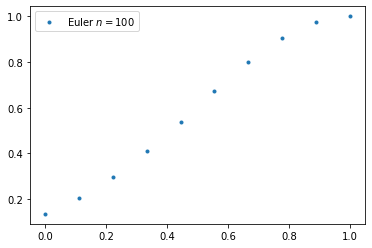

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def func1(t, x):
    return -4*(t-1)*x

if __name__=='__main__':
    t_0, t_max= 0, 1
    x_0= np.array([np.exp(-2)])
    t=np.linspace(t_0, t_max, 10)
    
    sol=solve_ivp(func1, (t_0, t_max), x_0, vectorized=False, t_eval=t)
    
    #print(sol.t, sol.y)
    #グラフ化
    plt.plot(sol.t,sol.y[0], marker=".", linestyle="", label="Euler $n={}$".format(100))
    
    plt.legend(loc='upper left')
    plt.show()

2階常微分方程式は次の通り。
先ほどと同様に、以下の常微分方程式を解いてみます。

$$
\frac{d^2x}{dt^2}=-x
$$

$t$の範囲は$t \in [0,10]$、初期条件を$[t_0, X_0, Y_0]=[0, 1, 0]$、分割数は$n=100$とします。  
連立1階常微分方程式へ帰着させると

$$\frac{dx}{dt}= y  \hspace{10mm}(=f_1(t, x, y))$$
$$\frac{dy}{dt}= -x \hspace{8mm}(=f_2(t, x, y))$$

となる。

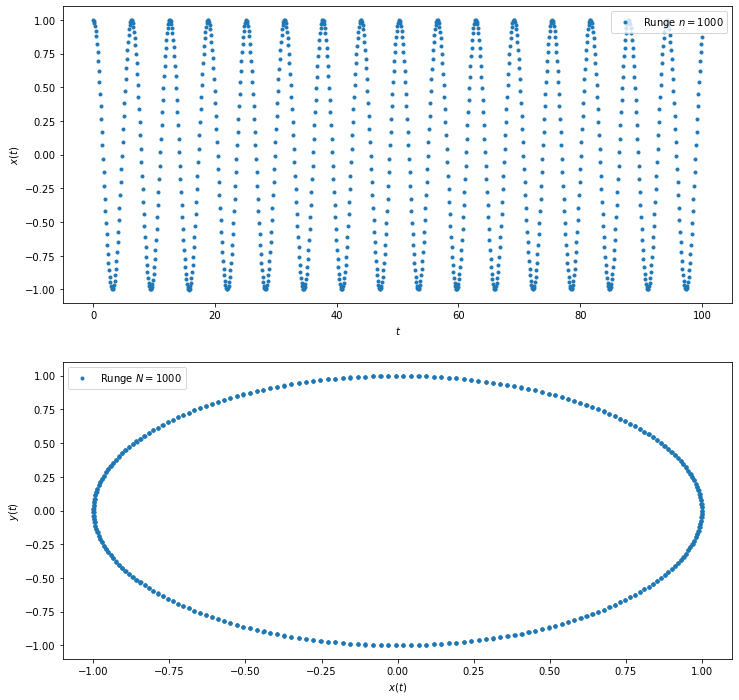

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def func1(t, x_ini):
    dxdt=x_ini[1]
    dydt=-x_ini[0]
    
    return dxdt, dydt

if __name__=='__main__':
    t_0, t_max= 0, 100
    x_ini= np.array([1, 0])
    t=np.linspace(t_0, t_max, 1000)
    
    sol=solve_ivp(func1, (t_0, t_max), x_ini, vectorized=False, t_eval=t)
    
    fig,ax=plt.subplots(2, 1, figsize=(12,12))
    #print(sol.t, sol.y)
    #時系列
    ax[0].plot(sol.t,sol.y[0],marker=".", linestyle="", label="Runge $n={}$".format(len(t)))
    ax[0].set(xlabel='$t$', ylabel='$x(t)$')
    ax[0].legend(loc='upper right')
    #x-y相図
    ax[1].plot(sol.y[0], sol.y[1], marker=".", linestyle="", label="Runge $N={}$".format(len(t)))
    ax[1].set(xlabel='$x(t)$', ylabel='$y(t)$')
    ax[1].legend(loc='upper left')
    plt.show()